<a href="https://colab.research.google.com/github/Bayaniblues/DS-Unit-2-Kaggle-Challenge/blob/master/Copy_of_LS_DS_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [X] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [X] Do train/validate/test split with the Tanzania Waterpumps data.
- [X] Begin with baselines for classification.
- [X] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

     |████████████████████████████████| 81kB 3.2MB/s 
     |████████████████████████████████| 266kB 4.7MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 3.1MB 14.2MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 604kB 44.5MB/s 
     |████████████████████████████████| 296kB 48.4MB/s 
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=f26ec0b85182b06b6cfa1de3cf4aab89e4f952982dc829ca6c8b5e6a646d0a02
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=99ff79bd5cea3907ba0c8ec6343e4b982083d5287faeb5bbdf62afb16589b5d4
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha25

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [38]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Method from Lecture

## Train val split

In [3]:
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

print(train.shape, val.shape, test.shape)

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # quantity & quantity_group are duplicates, so drop one
    X = X.drop(columns='quantity_group')
    
    # return the wrangled dataframe
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

(47520, 41) (11880, 41) (14358, 40)


In [4]:
train[['longitude', 'latitude']].describe()

,longitude,latitude
count,46078.000000,46078.000000
mean,35.149033,-5.884512
std,2.604241,2.805599
min,29.607122,-11.649440
25%,33.284679,-8.633876
50%,35.008578,-5.170151
75%,37.223501,-3.375068
max,40.344301,-0.998464


In [5]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)

# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [6]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

encoder = ce.OneHotEncoder(use_cat_names=True)
imputer = SimpleImputer()
scaler = StandardScaler()
model = LogisticRegression(max_iter=1000)

X_train_encoded = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)
model.fit(X_train_scaled, y_train)

X_val_encoded = encoder.transform(X_val)
X_val_imputed = imputer.transform(X_val_encoded)
X_val_scaled = scaler.transform(X_val_imputed)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Validation Accuracy 0.7308922558922559


## encoding stuff for Quantum

In [7]:
X_train_scaled

array([[-0.10068953, -0.96618925, -0.62632088, ..., -0.11600566,
        -0.04331755, -0.01025816],
       [ 0.05569697,  1.99052731, -0.18845488, ..., -0.11600566,
        -0.04331755, -0.01025816],
       [-0.09287021, -0.5477179 ,  1.20478077, ..., -0.11600566,
        -0.04331755, -0.01025816],
       ...,
       [-0.10068953, -0.10182946,  1.60423424, ..., -0.11600566,
        -0.04331755, -0.01025816],
       [-0.09130634, -0.35146926,  1.63762437, ..., -0.11600566,
        -0.04331755, -0.01025816],
       [-0.08505088, -0.24324391,  0.94100746, ..., -0.11600566,
        -0.04331755, -0.01025816]])

In [8]:
y_train

43360        functional
7263         functional
2486         functional
313      non functional
52726        functional
              ...      
9795     non functional
58170    non functional
17191    non functional
8192         functional
49783        functional
Name: status_group, Length: 47520, dtype: object

In [9]:
functional = y_train.replace({'functional': 1,
                   'functional needs repair':0,
                   'non functional': -1})

functional

43360    1
7263     1
2486     1
313     -1
52726    1
        ..
9795    -1
58170   -1
17191   -1
8192     1
49783    1
Name: status_group, Length: 47520, dtype: int64

In [10]:
df1 = X_train_encoded['basin_Lake Victoria']
df2 = X_train_encoded['basin_Lake Tanganyika']
df3 = X_train_encoded['basin_Pangani']
df4 = X_train_encoded['basin_Lake Rukwa']

result = pd.concat([df1, df2, df3, df4, functional], axis=1, sort=False).head(200)
result

,basin_Lake Victoria,basin_Lake Tanganyika,basin_Pangani,basin_Lake Rukwa,status_group
43360,0,0,0,0,1
7263,0,0,0,0,1
2486,0,0,0,0,1
313,1,0,0,0,-1
52726,0,0,0,0,1
...,...,...,...,...,...
42165,0,0,0,0,1
4602,0,0,0,0,0
58091,0,1,0,0,-1
32867,1,0,0,0,-1


In [0]:
Qnp = result.to_numpy()
np.savetxt('test.txt', Qnp,fmt='%s')

In [19]:
X_train_encoded.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year',
       'basin_Lake Nyasa',
       ...
       'waterpoint_type_communal standpipe multiple',
       'waterpoint_type_improved spring', 'waterpoint_type_cattle trough',
       'waterpoint_type_dam', 'waterpoint_type_group_communal standpipe',
       'waterpoint_type_group_hand pump', 'waterpoint_type_group_other',
       'waterpoint_type_group_improved spring',
       'waterpoint_type_group_cattle trough', 'waterpoint_type_group_dam'],
      dtype='object', length=180)

## Carry on with Classical method

In [20]:
X_train_encoded['longitude']

43360    33.542898
7263     34.665760
2486     38.238568
313      30.716727
52726    35.389331
           ...    
9795     38.268574
58170    33.926294
17191    39.262924
8192     39.348550
49783    37.562148
Name: longitude, Length: 47520, dtype: float64

In [21]:
X_val_encoded
X_test_encoded

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,basin_Lake Nyasa,basin_Rufiji,basin_Wami / Ruvu,basin_Lake Victoria,basin_Internal,basin_Lake Tanganyika,basin_Pangani,basin_Lake Rukwa,basin_Ruvuma / Southern Coast,region_Mbeya,region_Iringa,region_Pwani,region_Kagera,region_Dodoma,region_Rukwa,region_Arusha,region_Mwanza,region_Mtwara,region_Tanga,region_Kilimanjaro,region_Manyara,region_Lindi,region_Kigoma,region_Morogoro,region_Shinyanga,region_Ruvuma,region_Tabora,region_Mara,region_Singida,region_Dar es Salaam,public_meeting_True,...,quality_group_unknown,quality_group_colored,quantity_insufficient,quantity_enough,quantity_dry,quantity_seasonal,quantity_unknown,source_spring,source_shallow well,source_machine dbh,source_river,source_hand dtw,source_lake,source_rainwater harvesting,source_dam,source_other,source_unknown,source_type_spring,source_type_shallow well,source_type_borehole,source_type_river/lake,source_type_rainwater harvesting,source_type_dam,source_type_other,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_hand pump,waterpoint_type_other,waterpoint_type_communal standpipe multiple,waterpoint_type_improved spring,waterpoint_type_cattle trough,waterpoint_type_dam,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_other,waterpoint_type_group_improved spring,waterpoint_type_group_cattle trough,waterpoint_type_group_dam
0,0.0,1996,35.290799,-4.059696,0,21,3,321,2012,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0.0,1569,36.656709,-3.309214,0,2,2,300,2000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.0,1567,34.767863,-5.004344,0,13,2,500,2010,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0.0,267,38.058046,-9.418672,0,80,43,250,1987,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,500.0,1260,35.006123,-10.950412,0,10,3,60,2000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14353,0.0,34,38.852669,-6.582841,0,6,1,20,1988,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
14354,1000.0,0,37.451633,-5.350428,0,4,7,2960,1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
14355,0.0,1476,34.739804,-4.585587,0,13,2,200,2010,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
14356,0.0,998,35.432732,-10.584159,0,10,2,150,2009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0


## Logistic Regression

In [22]:
# With just long & lat, a Logistic Regression can't beat the majority classifier baseline
train_location = X_train[['longitude', 'latitude']].copy()
val_location = X_val[['longitude', 'latitude']].copy()

lr = make_pipeline(
    SimpleImputer(),
    LogisticRegression(solver='lbfgs', multi_class='auto', n_jobs=-1)
)

lr.fit(train_location, y_train)
print('Logistic Regression:')
print('Train Accuracy', lr.score(train_location, y_train))
print('Validation Accuracy', lr.score(val_location, y_val))

Logistic Regression:
Train Accuracy 0.5430765993265994
Validation Accuracy 0.5430976430976431


## pipeline

In [23]:
## Pipeline for more accurate data
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

# fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)

Validation Accuracy 0.7308922558922559


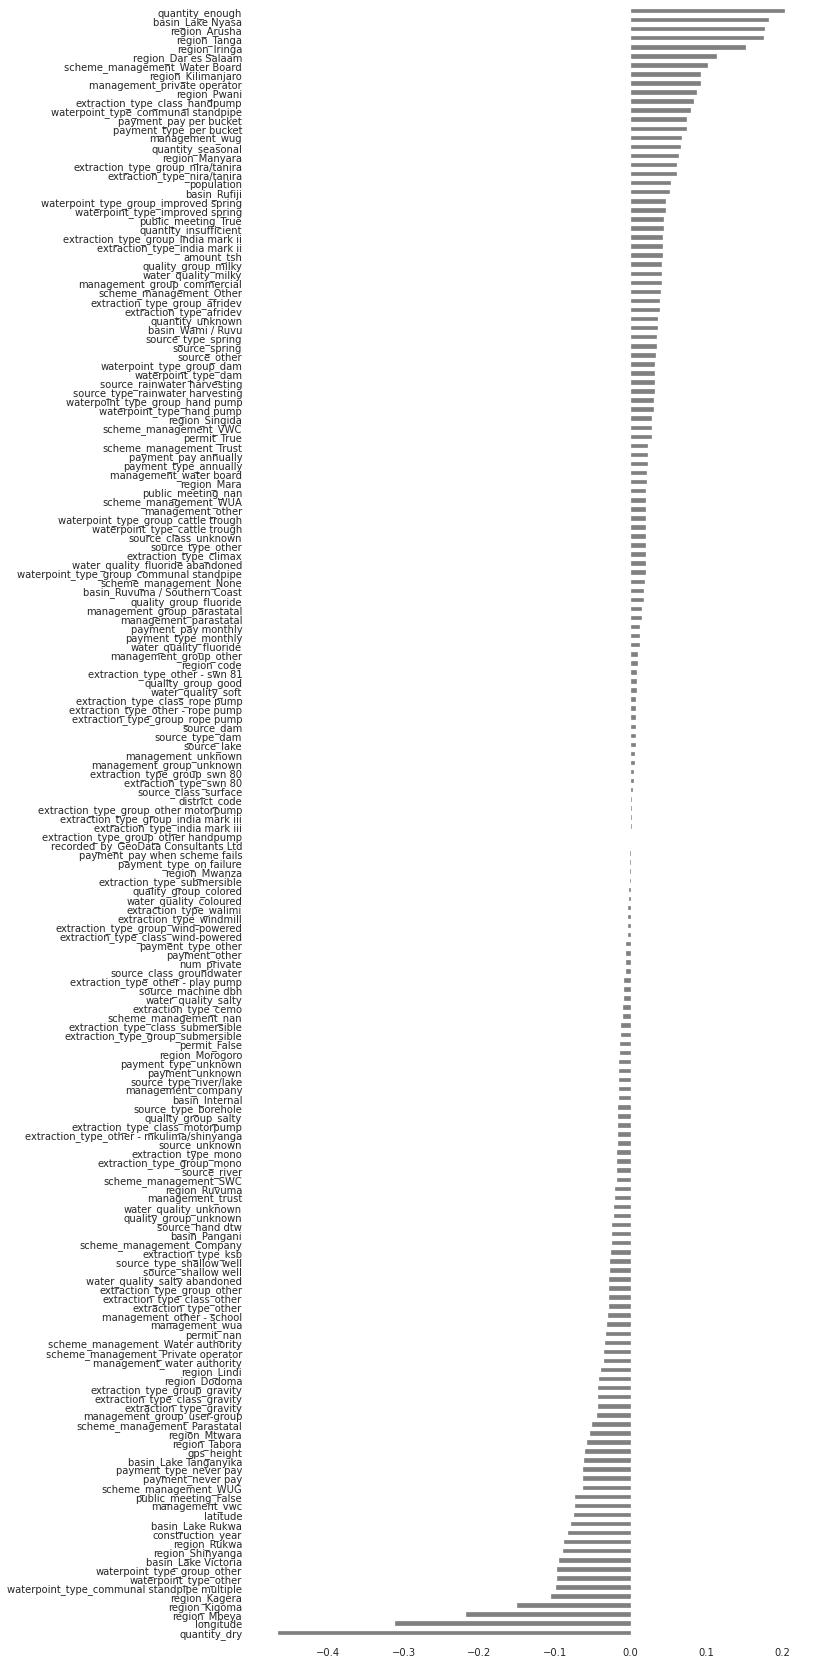

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

model = pipeline.named_steps['logisticregression']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
coefficients = pd.Series(model.coef_[0], encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');

# Quantum Implementation 

In [12]:
!pip install pennylane
!pip install pennylane-qiskit
# Restart runtime after installing

     |████████████████████████████████| 245kB 4.4MB/s 
     |████████████████████████████████| 6.7MB 6.2MB/s 
     |████████████████████████████████| 23.3MB 70.0MB/s 
     |████████████████████████████████| 163kB 48.7MB/s 
     |████████████████████████████████| 174kB 44.4MB/s 
     |████████████████████████████████| 1.9MB 44.4MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 5.8MB 40.9MB/s 
     |████████████████████████████████| 768kB 36.2MB/s 
     |████████████████████████████████| 296kB 45.0MB/s 
     |████████████████████████████████| 71kB 6.1MB/s 
     |████████████████████████████████| 573kB 39.1MB/s 
     |████████████████████████████████| 26.0MB 135kB/s 
     |████████████████████████████████| 2.7MB 45.6MB/s 
  Created wheel for qiskit: filename=qiskit-0.19.3-cp36-none-any.whl size=2899 sha256=00907302384946cc5729c24f089afdda89754c363767ab1e45bcc0591214d557
  Stored in dire

### Import everything

In [0]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer

dev = qml.device('qiskit.ibmq', wires=4, backend='ibmq_london', ibmqx_token="dd92268710421bc57b449cf690a0e456e7708f96dd0e777ed43d665435a0852ee1faf9bb28814dfc72e42dfdd6695f1b0d451a325b12051e24cb15d0cfeb0c56")

### Quantum Ceremony

In [0]:
# All this is just semantics
# Declare Qbit rotation with qantum gates
def layer(W):

    qml.Rot(W[0, 0], W[0, 1], W[0, 2], wires=0)
    qml.Rot(W[1, 0], W[1, 1], W[1, 2], wires=1)
    qml.Rot(W[2, 0], W[2, 1], W[2, 2], wires=2)
    qml.Rot(W[3, 0], W[3, 1], W[3, 2], wires=3)

    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 0])

# Basis state is a pennylane function that expects X to be binary
def statepreparation(x):
    qml.BasisState(x, wires=[0, 1, 2, 3])

# state preparation and declare layers and call the weights
@qml.qnode(dev)
def circuit(weights, x=None):

    statepreparation(x)

    for W in weights:
        layer(W)

    return qml.expval(qml.PauliZ(0))

# Reshape values for the quantum node
def variational_classifier(var, x=None):
    weights = var[0]
    bias = var[1]
    return circuit(weights, x=x) + bias

### Cost

In [0]:
# Cost function is the sum of a loss function and regularizer
# standard square loss that measures the distance between the target labels and model

def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

# How we determine accuracy
def accuracy(labels, predictions):

    loss = 0
    for l, p in zip(labels, predictions):
        if abs(l - p) < 1e-5:
            loss = loss + 1
    loss = loss / len(labels)

    return loss

# cost depends on data and the iteration of optimization routine(see below)
def cost(var, X, Y):
    predictions = [variational_classifier(var, x=x) for x in X]
    return square_loss(Y, predictions)

### Optimization

In [4]:
# import qbits
data = np.loadtxt("https://raw.githubusercontent.com/XanaduAI/qml/master/demonstrations/variational_classifier/data/parity.txt")
X = data[:, :-1]
Y = data[:, -1]
Y = Y * 2 - np.ones(len(Y))  # shift label from {0, 1} to {-1, 1}

for i in range(5):
    print("X = {}, Y = {: d}".format(X[i], int(Y[i])))

print("...")

X = [0. 0. 0. 0.], Y = -1
X = [0. 0. 0. 1.], Y =  1
X = [0. 0. 1. 0.], Y =  1
X = [0. 0. 1. 1.], Y = -1
X = [0. 1. 0. 0.], Y =  1
...


In [5]:
np.random.seed(0)
num_qubits = 4
num_layers = 2
var_init = (0.01 * np.random.randn(num_layers, num_qubits, 3), 0.0)

print(var_init)


(array([[[ 0.01764052,  0.00400157,  0.00978738],
        [ 0.02240893,  0.01867558, -0.00977278],
        [ 0.00950088, -0.00151357, -0.00103219],
        [ 0.00410599,  0.00144044,  0.01454274]],

       [[ 0.00761038,  0.00121675,  0.00443863],
        [ 0.00333674,  0.01494079, -0.00205158],
        [ 0.00313068, -0.00854096, -0.0255299 ],
        [ 0.00653619,  0.00864436, -0.00742165]]]), 0.0)


In [0]:
opt = NesterovMomentumOptimizer(0.5)
batch_size = 5


In [7]:
var = var_init
for it in range(25):

    # Update the weights by one optimizer step
    batch_index = np.random.randint(0, len(X), (batch_size,))
    X_batch = X[batch_index]
    Y_batch = Y[batch_index]
    var = opt.step(lambda v: cost(v, X_batch, Y_batch), var)

    # Compute accuracy
    predictions = [np.sign(variational_classifier(var, x=x)) for x in X]
    acc = accuracy(Y, predictions)

    print("Iter: {:5d} | Cost: {:0.7f} | Accuracy: {:0.7f} ".format(it + 1, cost(var, X, Y), acc))


Iter:     1 | Cost: 3.4355534 | Accuracy: 0.5000000 
Iter:     2 | Cost: 1.9287800 | Accuracy: 0.5000000 
Iter:     3 | Cost: 2.0341238 | Accuracy: 0.5000000 
Iter:     4 | Cost: 1.6372574 | Accuracy: 0.5000000 
Iter:     5 | Cost: 1.3025395 | Accuracy: 0.6250000 
Iter:     6 | Cost: 1.4555019 | Accuracy: 0.3750000 
Iter:     7 | Cost: 1.4492786 | Accuracy: 0.5000000 
Iter:     8 | Cost: 0.6510286 | Accuracy: 0.8750000 
Iter:     9 | Cost: 0.0566074 | Accuracy: 1.0000000 
Iter:    10 | Cost: 0.0053045 | Accuracy: 1.0000000 
Iter:    11 | Cost: 0.0809483 | Accuracy: 1.0000000 
Iter:    12 | Cost: 0.1115426 | Accuracy: 1.0000000 
Iter:    13 | Cost: 0.1460257 | Accuracy: 1.0000000 
Iter:    14 | Cost: 0.0877037 | Accuracy: 1.0000000 
Iter:    15 | Cost: 0.0361311 | Accuracy: 1.0000000 
Iter:    16 | Cost: 0.0040937 | Accuracy: 1.0000000 
Iter:    17 | Cost: 0.0004899 | Accuracy: 1.0000000 
Iter:    18 | Cost: 0.0005290 | Accuracy: 1.0000000 
Iter:    19 | Cost: 0.0024304 | Accuracy: 1.00

# Classification

In [0]:
dev = qml.device("default.qubit", wires=2)

In [0]:
def get_angles(x):

    beta0 = 2 * np.arcsin(np.sqrt(x[1] ** 2) / np.sqrt(x[0] ** 2 + x[1] ** 2 + 1e-12))
    beta1 = 2 * np.arcsin(np.sqrt(x[3] ** 2) / np.sqrt(x[2] ** 2 + x[3] ** 2 + 1e-12))
    beta2 = 2 * np.arcsin(
        np.sqrt(x[2] ** 2 + x[3] ** 2) / np.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2 + x[3] ** 2)
    )

    return np.array([beta2, -beta1 / 2, beta1 / 2, -beta0 / 2, beta0 / 2])


def statepreparation(a):
    qml.RY(a[0], wires=0)

    qml.CNOT(wires=[0, 1])
    qml.RY(a[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[2], wires=1)

    qml.PauliX(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[3], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[4], wires=1)
    qml.PauliX(wires=0)

In [9]:
x = np.array([0.53896774, 0.79503606, 0.27826503, 0.0])
ang = get_angles(x)


@qml.qnode(dev)
def test(angles=None):

    statepreparation(angles)

    return qml.expval(qml.PauliZ(0))


test(angles=ang)

print("x               : ", x)
print("angles          : ", ang)
print("amplitude vector: ", np.real(dev._state))

x               :  [0.53896774 0.79503606 0.27826503 0.        ]
angles          :  [ 0.56397465 -0.          0.         -0.97504604  0.97504604]
amplitude vector:  [[ 5.38967743e-01  7.95036065e-01]
 [ 2.78265032e-01 -2.77555756e-17]]


In [0]:
def layer(W):
    qml.Rot(W[0, 0], W[0, 1], W[0, 2], wires=0)
    qml.Rot(W[1, 0], W[1, 1], W[1, 2], wires=1)
    qml.CNOT(wires=[0, 1])

In [0]:
@qml.qnode(dev)
def circuit(weights, angles=None):
    statepreparation(angles)

    for W in weights:
        layer(W)

    return qml.expval(qml.PauliZ(0))


def variational_classifier(var, angles=None):
    weights = var[0]
    bias = var[1]
    return circuit(weights, angles=angles) + bias


def cost(weights, features, labels):
    predictions = [variational_classifier(weights, angles=f) for f in features]
    return square_loss(labels, predictions)

In [12]:
data = np.loadtxt("test.txt")
X = data[:, 0:2]
print("First X sample (original)  :", X[0])

# pad the vectors to size 2^2 with constant values
padding = 0.3 * np.ones((len(X), 1))
X_pad = np.c_[np.c_[X, padding], np.zeros((len(X), 1))]
print("First X sample (padded)    :", X_pad[0])

# normalize each input
normalization = np.sqrt(np.sum(X_pad ** 2, -1))
X_norm = (X_pad.T / normalization).T
print("First X sample (normalized):", X_norm[0])

# angles for state preparation are new features
features = np.array([get_angles(x) for x in X_norm])
print("First features sample      :", features[0])

Y = data[:, -1]


First X sample (original)  : [0. 0.]
First X sample (padded)    : [0.  0.  0.3 0. ]
First X sample (normalized): [0. 0. 1. 0.]
First features sample      : [ 3.14159265 -0.          0.         -0.          0.        ]


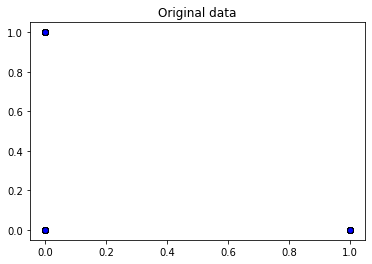

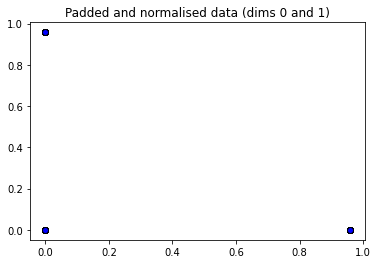

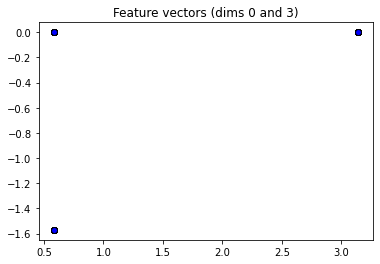

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[:, 0][Y == 1], X[:, 1][Y == 1], c="r", marker="o", edgecolors="k")
plt.scatter(X[:, 0][Y == -1], X[:, 1][Y == -1], c="b", marker="o", edgecolors="k")
plt.title("Original data")
plt.show()

plt.figure()
dim1 = 0
dim2 = 1
plt.scatter(X_norm[:, dim1][Y == 1], X_norm[:, dim2][Y == 1], c="r", marker="o", edgecolors="k")
plt.scatter(X_norm[:, dim1][Y == -1], X_norm[:, dim2][Y == -1], c="b", marker="o", edgecolors="k")
plt.title("Padded and normalised data (dims {} and {})".format(dim1, dim2))
plt.show()

plt.figure()
dim1 = 0
dim2 = 3
plt.scatter(features[:, dim1][Y == 1], features[:, dim2][Y == 1], c="r", marker="o", edgecolors="k")
plt.scatter(
    features[:, dim1][Y == -1], features[:, dim2][Y == -1], c="b", marker="o", edgecolors="k"
)
plt.title("Feature vectors (dims {} and {})".format(dim1, dim2))
plt.show()

In [0]:
np.random.seed(0)
num_data = len(Y)
num_train = int(0.75 * num_data)
index = np.random.permutation(range(num_data))
feats_train = features[index[:num_train]]
Y_train = Y[index[:num_train]]
feats_val = features[index[num_train:]]
Y_val = Y[index[num_train:]]

# We need these later for plotting
X_train = X[index[:num_train]]
X_val = X[index[num_train:]]

num_qubits = 2
num_layers = 6
var_init = (0.01 * np.random.randn(num_layers, num_qubits, 3), 0.0)


In [0]:
opt = NesterovMomentumOptimizer(0.01)
batch_size = 5

# train the variational classifier
var = var_init
for it in range(100):

    # Update the weights by one optimizer step
    batch_index = np.random.randint(0, num_train, (batch_size,))
    feats_train_batch = feats_train[batch_index]
    Y_train_batch = Y_train[batch_index]
    var = opt.step(lambda v: cost(v, feats_train_batch, Y_train_batch), var)

    # Compute predictions on train and validation set
    predictions_train = [np.sign(variational_classifier(var, angles=f)) for f in feats_train]
    predictions_val = [np.sign(variational_classifier(var, angles=f)) for f in feats_val]

    # Compute accuracy on train and validation set
    acc_train = accuracy(Y_train, predictions_train)
    acc_val = accuracy(Y_val, predictions_val)

    print(
        "Iter: {:5d} | Cost: {:0.7f} | Acc train: {:0.7f} | Acc validation: {:0.7f} "
        "".format(it + 1, cost(var, features, Y), acc_train, acc_val)
    )


Iter:     1 | Cost: 2.2348014 | Acc train: 0.3066667 | Acc validation: 0.5000000 
Iter:     2 | Cost: 2.2164806 | Acc train: 0.3066667 | Acc validation: 0.5000000 
Iter:     3 | Cost: 2.1477091 | Acc train: 0.3066667 | Acc validation: 0.5000000 
Iter:     4 | Cost: 2.0737688 | Acc train: 0.3066667 | Acc validation: 0.5000000 
Iter:     5 | Cost: 1.9826735 | Acc train: 0.3066667 | Acc validation: 0.5000000 
Iter:     6 | Cost: 1.8879686 | Acc train: 0.3066667 | Acc validation: 0.5000000 
Iter:     7 | Cost: 1.7939810 | Acc train: 0.3066667 | Acc validation: 0.5000000 
Iter:     8 | Cost: 1.6980822 | Acc train: 0.3066667 | Acc validation: 0.5000000 
Iter:     9 | Cost: 1.6172319 | Acc train: 0.3066667 | Acc validation: 0.5000000 
Iter:    10 | Cost: 1.5042008 | Acc train: 0.3066667 | Acc validation: 0.5000000 
Iter:    11 | Cost: 1.3822127 | Acc train: 0.3066667 | Acc validation: 0.5000000 
Iter:    12 | Cost: 1.2476745 | Acc train: 0.3066667 | Acc validation: 0.5000000 
Iter:    13 | Co

<Figure size 432x288 with 0 Axes>

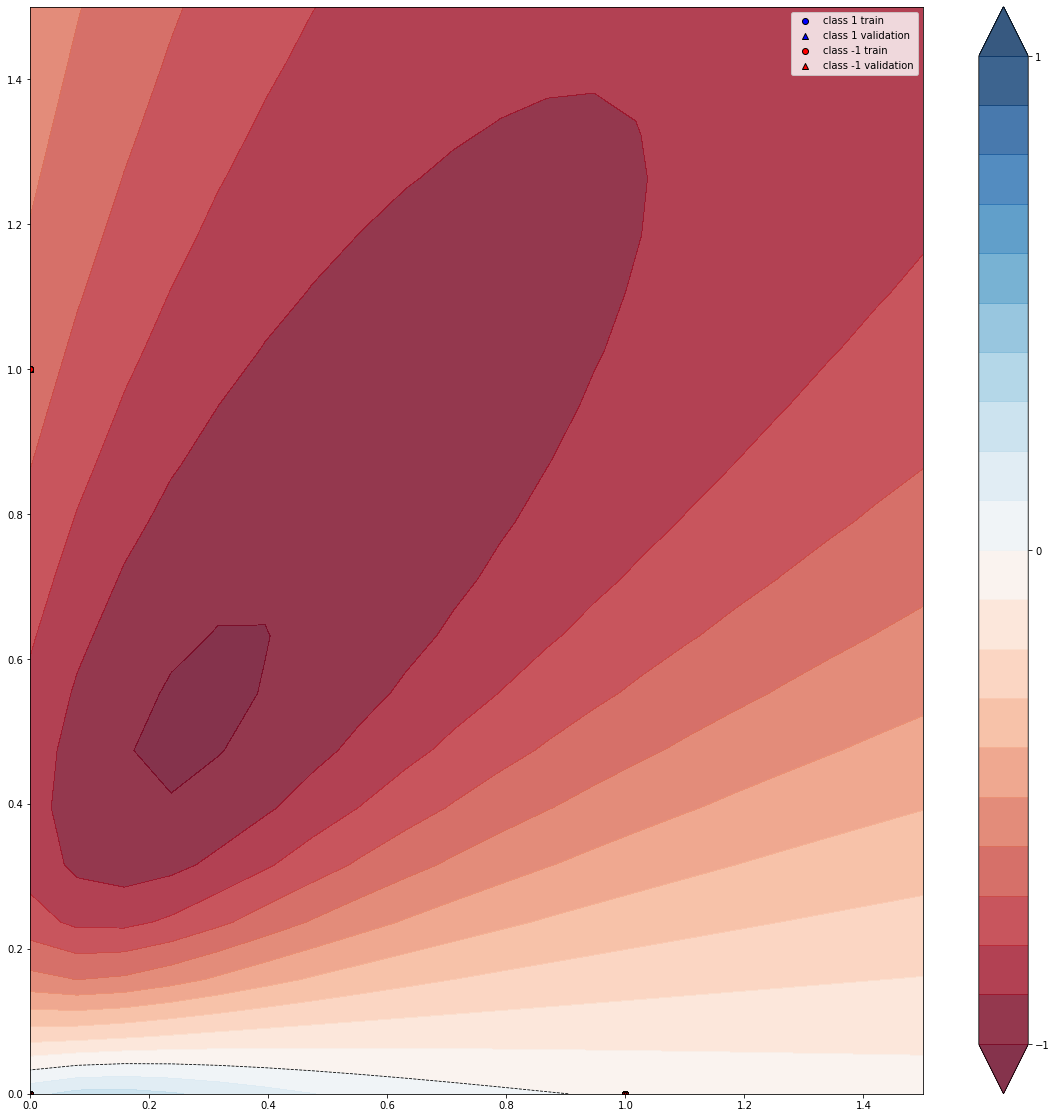

In [33]:
plt.figure()
cm = plt.cm.RdBu

# make data for decision regions
xx, yy = np.meshgrid(np.linspace(0.0, 1.5, 20), np.linspace(0.0, 1.5, 20))
X_grid = [np.array([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]

# preprocess grid points like data inputs above
padding = 0.3 * np.ones((len(X_grid), 1))
X_grid = np.c_[np.c_[X_grid, padding], np.zeros((len(X_grid), 1))]  # pad each input
normalization = np.sqrt(np.sum(X_grid ** 2, -1))
X_grid = (X_grid.T / normalization).T  # normalize each input
features_grid = np.array(
    [get_angles(x) for x in X_grid]
)  # angles for state preparation are new features
predictions_grid = [variational_classifier(var, angles=f) for f in features_grid]
Z = np.reshape(predictions_grid, xx.shape)
plt.figure(figsize=(20,20))
# plot decision regions
cnt = plt.contourf(xx, yy, Z, levels=np.arange(-1, 1.1, 0.1), cmap=cm, alpha=0.8, extend="both")
plt.contour(xx, yy, Z, levels=[0.0], colors=("black",), linestyles=("--",), linewidths=(0.8,))
plt.colorbar(cnt, ticks=[-1, 0, 1])

# plot data
plt.scatter(
    X_train[:, 0][Y_train == 1],
    X_train[:, 1][Y_train == 1],
    c="b",
    marker="o",
    edgecolors="k",
    label="class 1 train",
)
plt.scatter(
    X_val[:, 0][Y_val == 1],
    X_val[:, 1][Y_val == 1],
    c="b",
    marker="^",
    edgecolors="k",
    label="class 1 validation",
)
plt.scatter(
    X_train[:, 0][Y_train == -1],
    X_train[:, 1][Y_train == -1],
    c="r",
    marker="o",
    edgecolors="k",
    label="class -1 train",
)
plt.scatter(
    X_val[:, 0][Y_val == -1],
    X_val[:, 1][Y_val == -1],
    c="r",
    marker="^",
    edgecolors="k",
    label="class -1 validation",
)

plt.legend()
plt.show()

